In [1]:
#!\usr\bin\env python3

In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt
import seaborn as sb

In [3]:
import pandas as pd

In [80]:
from VCBerry import *

In [81]:
#read in VCF file 
VCF=VCBerry('/Users/pfb21/VCFruit_JTG/biall_1chr.vcf')
VCF_df=VCF.allvars
VCF_pos_list=list(VCF_df['POS'])
print(len(VCF_pos_list))

4957048


In [82]:
mock_whole=VCF_pos_list

In [4]:
#generate mock dataset. List of chromosome positions of variants. Introduce cluster.
#rng=np.random.default_rng()
#mock_var=[]
#mock_cluster=[]
#for i in range(1000):
#    mock_var.append(rng.integers(134019835))

#for i in range(1000):
#    mock_cluster.append(rng.integers(low=10000000, high=50000000))

#mock_whole=mock_var + mock_cluster


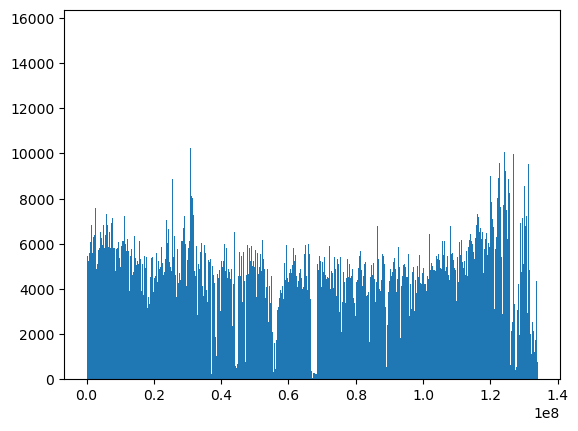

In [83]:
#make histogram of variant frequency along length of chromosome
mock_whole_hist=plt.hist(mock_whole, bins=1000)
index=np.linspace(0, 134019835, num=2000, dtype=int)
mock_whole_dict={}
count=0
for i in index:
    mock_whole_dict[i]=mock_whole[count]
    count=count+1 


{'0-1340198.35': 59706, '1353735-2693933.35': 61224, '2707471-4047669.35': 58746, '4061207-5401405.35': 63234, '5414942-6755140.35': 68058, '6768678-8108876.35': 65111, '8122414-9462612.35': 57121, '9476149-10816347.35': 57679, '10829885-12170083.35': 60017, '12183621-13523819.35': 53759, '13537357-14877555.35': 55270, '14891092-16231290.35': 51787, '16244828-17585026.35': 46779, '17598564-18938762.35': 41078, '18952299-20292497.35': 44253, '20306035-21646233.35': 49243, '21659771-22999969.35': 52447, '23013507-24353705.35': 59097, '24367242-25707440.35': 58915, '25720978-27061176.35': 54618, '27074714-28414912.35': 47745, '28428449-29768647.35': 57493, '29782185-31122383.35': 63323, '31135921-32476119.35': 70592, '32489656-33829854.35': 50665, '33843392-35183590.35': 46998, '35197128-36537326.35': 48237, '36550864-37891062.35': 44111, '37904599-39244797.35': 30882, '39258335-40598533.35': 49113, '40612071-41952269.35': 59080, '41965806-43306004.35': 46212, '43319542-44659740.35': 3433

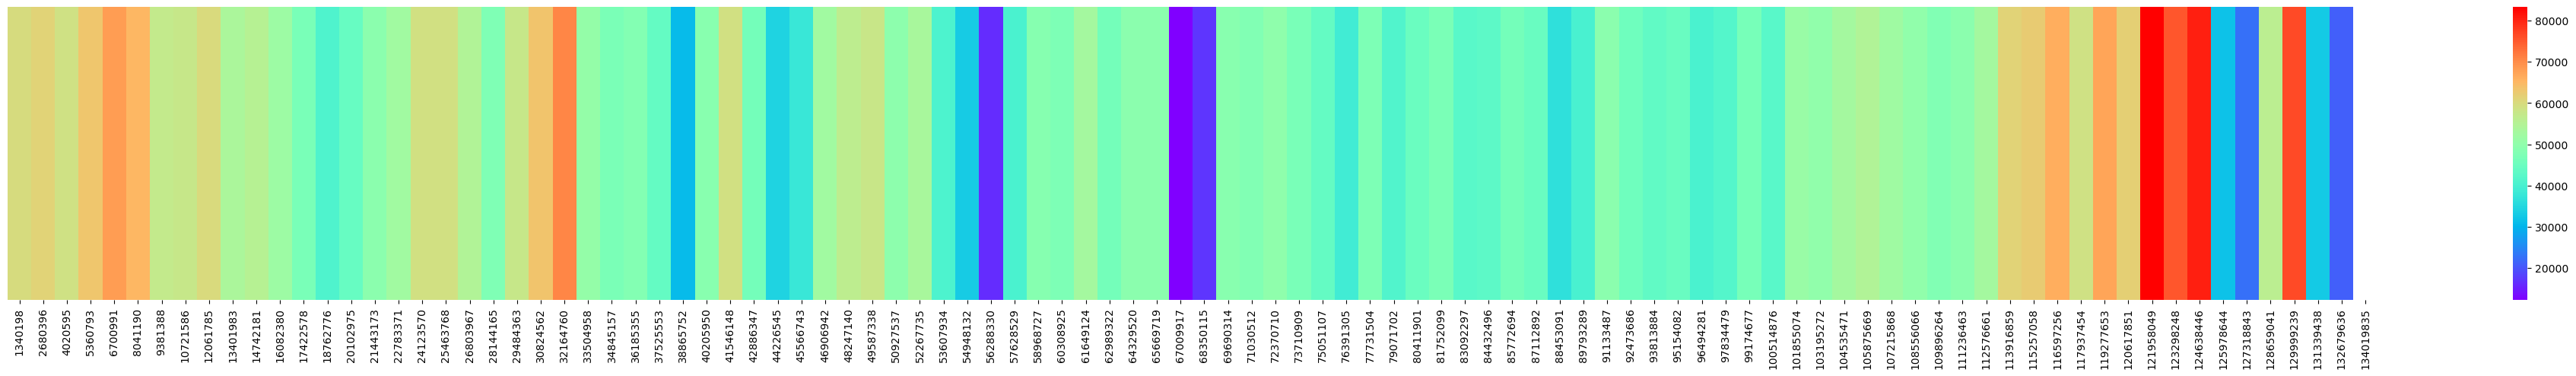

In [88]:
#make heatmap
#find frequency of values in bins of a given width 
num_bins=100   #number of bins
chrm_len=int(134019835)  #define chromosome length 
binwidth=chrm_len/int(num_bins)
binlist=list(np.linspace(0, chrm_len, num=num_bins, dtype=int)) #create the x-axis for the heatmap. Center of each bin in list
hm_xax=np.linspace(binwidth, chrm_len, num=num_bins, dtype=int)#create the x-axis for the heatmap. Center of each bin in list
#make a dictionary that lists the bins as keys, frquency of variant within as value
counts_dict={}
for i in binlist:
    binmax=i+binwidth
    binmin=i
    for var in mock_whole:
        if var<=binmax and var>binmin:
            if f'{binmin}-{binmax}' not in counts_dict:
                counts_dict[f'{binmin}-{binmax}']=1
            else:
                counts_dict[f'{binmin}-{binmax}']=counts_dict[f'{binmin}-{binmax}']+1

#make an array from the dictionary to allow heatmap generation
counts_list_by_bin=list(counts_dict.values()) #generates a list of key value pairs
#Heatmap requires a 2D array. To create a 2d data structure from a 1D list, replicate list x times to make a list of replicated lists, then convert to array
counts_list_by_bin_rep=[]  #empty list, will iterate in the replicated lists below
for i in range(10):        # number of replicates   
    counts_list_by_bin_rep.append(counts_list_by_bin)    
counts_array=np.array(counts_list_by_bin_rep) #creates an array with bins in first column, counts in second
fig, ax = plt.subplots(figsize=(50, 5))
counts_heatmap=sb.heatmap(counts_array, cmap='rainbow', yticklabels=False, xticklabels=hm_xax)
#counts_heatmap.set_xticklabels(labels=hm_xax, rotation=45)

counts_heatmap

0-1340198.35              1.204467
1353735-2693933.35        1.235090
2707471-4047669.35        1.185100
4061207-5401405.35        1.275638
5414942-6755140.35        1.372954
                            ...   
127251156-128591354.35    0.457409
128604892-129945090.35    1.127223
129958627-131298825.35    1.543560
131312363-132652561.35    0.666707
132666099-134006297.35    0.424386
Name: Enrichment, Length: 99, dtype: float64

In [121]:
sig_list=[]
for p in p_list:
    if p<0.05:
        sig_list.append(p)
        
sig_list

[0.000514, 0.004279]